#### Import of Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pca import pca
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pycaret as pc

sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (7,5)

#### Dataset

In [2]:
df1 = pd.read_csv('datasets/heart2020/heart2020.csv')
df = df1.head(n=500)
df = df.drop(columns=["AgeCategory", "Race", "GenHealth", "Diabetic", "Asthma", "KidneyDisease", "SkinCancer","PhysicalHealth", "MentalHealth"])

df=df.replace("No",0)  
df=df.replace("Yes",1)

# Sex: 0 for females and 1 for males
df["Sex"]=df["Sex"].replace("Female",0)  
df["Sex"]=df["Sex"].replace("Male",1)


In [3]:
df.head(25)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,PhysicalActivity,SleepTime
0,0,16.60,1,0,0,0,0,1,5.0
1,0,20.34,0,0,1,0,0,1,7.0
2,0,26.58,1,0,0,0,1,1,8.0
3,0,24.21,0,0,0,0,0,0,6.0
4,0,23.71,0,0,0,1,0,1,8.0
5,1,28.87,1,0,0,1,0,0,12.0
6,0,21.63,0,0,0,0,0,1,4.0
7,0,31.64,1,0,0,1,0,0,9.0
8,0,26.45,0,0,0,0,0,0,5.0
9,0,40.69,0,0,0,1,1,1,10.0


In [4]:
df.info()
print("Number of duplicated rows is: ", df.duplicated().sum())
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      500 non-null    int64  
 1   BMI               500 non-null    float64
 2   Smoking           500 non-null    int64  
 3   AlcoholDrinking   500 non-null    int64  
 4   Stroke            500 non-null    int64  
 5   DiffWalking       500 non-null    int64  
 6   Sex               500 non-null    int64  
 7   PhysicalActivity  500 non-null    int64  
 8   SleepTime         500 non-null    float64
dtypes: float64(2), int64(7)
memory usage: 35.3 KB
Number of duplicated rows is:  6
Number of rows with NaNs is:  0


#### Exploratory Data Analysis

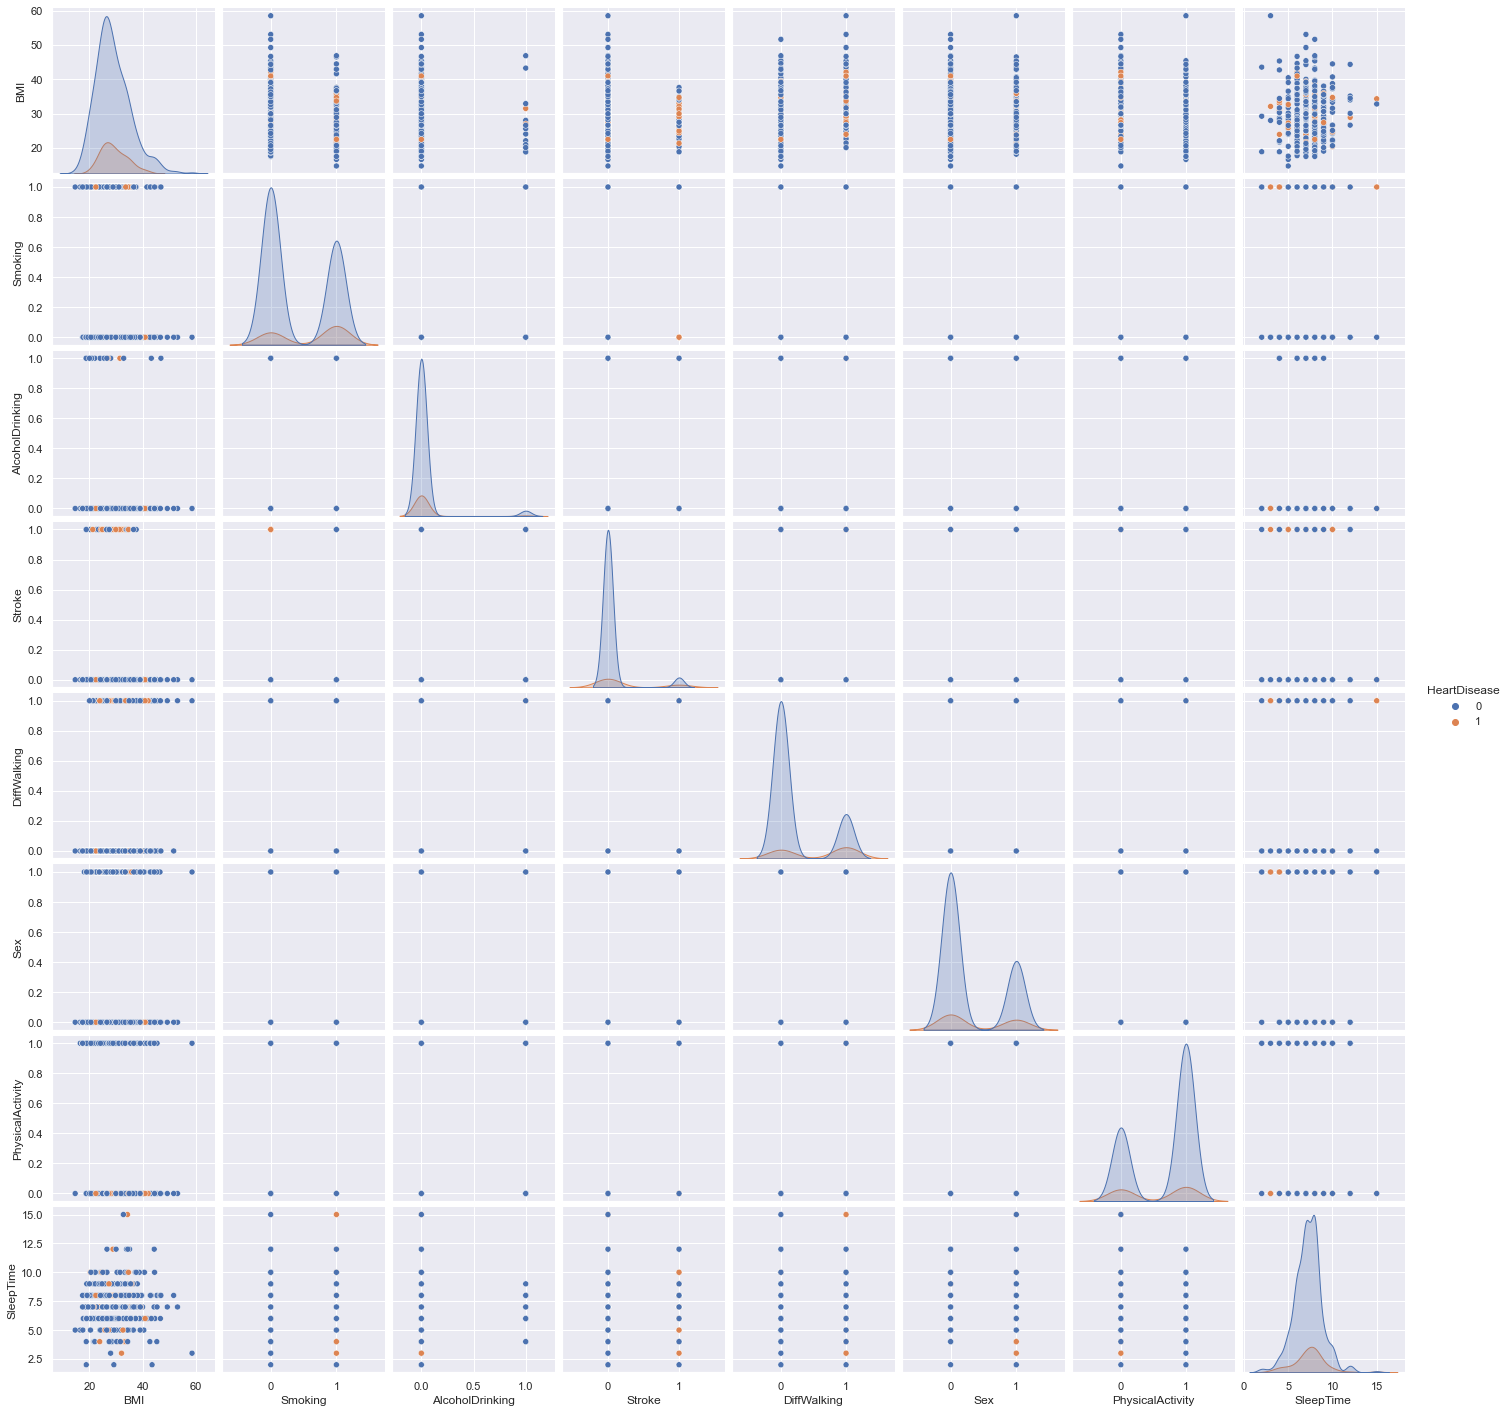

In [5]:
sns.pairplot(df, hue='HeartDisease')
plt.show()

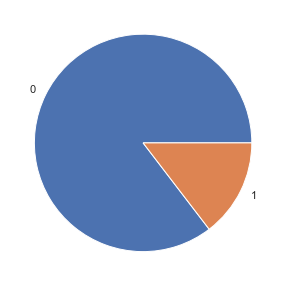

In [6]:
y =df['HeartDisease']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

#### Data Matrix

In [7]:
X = df.drop(columns=['HeartDisease'])
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BMI,500.0,28.90728,6.321171,14.69,24.7725,27.84,32.71,58.54
Smoking,500.0,0.42800,0.495284,0.00,0.0000,0.00,1.00,1.00
AlcoholDrinking,500.0,0.03200,0.176176,0.00,0.0000,0.00,0.00,1.00
Stroke,500.0,0.08400,0.277666,0.00,0.0000,0.00,0.00,1.00
DiffWalking,500.0,0.27000,0.444404,0.00,0.0000,0.00,1.00,1.00
Sex,500.0,0.31800,0.466166,0.00,0.0000,0.00,1.00,1.00
PhysicalActivity,500.0,0.66200,0.473502,0.00,0.0000,1.00,1.00,1.00
SleepTime,500.0,7.24800,1.602383,2.00,6.0000,7.00,8.00,15.00


#### Standardize the Data

In [8]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BMI,500.0,-5.613288e-16,1.001002,-2.251405,-0.654771,-0.169011,0.602187,4.692548
Smoking,500.0,0.000000e+00,1.001002,-0.865015,-0.865015,-0.865015,1.156049,1.156049
AlcoholDrinking,500.0,2.131628e-17,1.001002,-0.181818,-0.181818,-0.181818,-0.181818,5.500000
Stroke,500.0,-4.263256e-17,1.001002,-0.302825,-0.302825,-0.302825,-0.302825,3.302236
DiffWalking,500.0,-1.776357e-17,1.001002,-0.608164,-0.608164,-0.608164,1.644294,1.644294
Sex,500.0,-3.019807e-17,1.001002,-0.682844,-0.682844,-0.682844,1.464464,1.464464
PhysicalActivity,500.0,-1.083578e-16,1.001002,-1.399493,-1.399493,0.714545,0.714545,0.714545
SleepTime,500.0,-1.474376e-16,1.001002,-3.278402,-0.779620,-0.154924,0.469771,4.842640


#### Observations and Variables

In [9]:
observations = list(df.index)
variables = list(df.columns)

#### Box and Whisker Plots

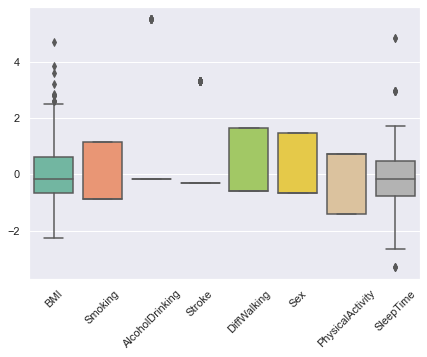

In [10]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

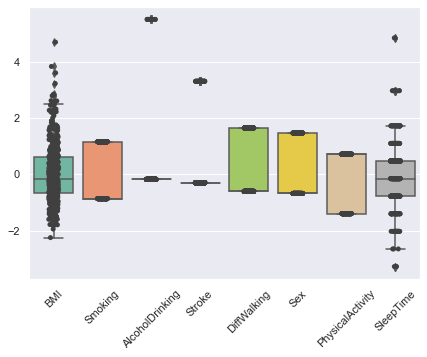

In [11]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

#### Correlation Matrix

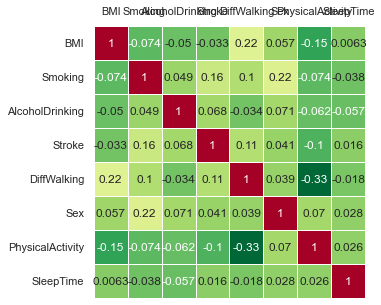

In [12]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#### PCA

In [13]:
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [8] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [8] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [8] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[8]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


PCs

In [14]:
out['PC']

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-1.214856,1.297992,1.344006,0.118255,-1.677188,-0.792974,0.097447,0.382291
1,-0.571598,1.065983,1.327588,-2.301325,-0.391994,2.366339,-0.776213,-0.141535
2,-0.425208,1.569978,-1.344331,0.335640,-0.198134,-0.425145,0.150418,-0.186186
3,-0.297015,-0.797839,1.407815,-0.072485,-0.255209,-0.501376,-0.382165,-1.286206
4,-0.206146,-0.828913,0.065666,-0.652529,-0.066251,-0.364254,-1.331251,1.543575
...,...,...,...,...,...,...,...,...
495,-1.520898,-0.400528,0.167111,-0.599198,0.172952,-0.038796,-0.268393,0.179185
496,0.160692,0.951728,-1.529764,1.279774,-0.195106,0.398475,0.936807,-0.203140
497,-0.264812,1.451923,-1.126680,0.850381,-0.437521,-0.119110,0.291307,-0.221531
498,1.323810,-1.656523,0.646827,-0.169824,0.010728,-0.565453,-0.878264,0.133689


Scatter Plot

(<Figure size 1440x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'8 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (19.3% expl.var)', ylabel='PC2 (16.2% expl.var)'>)

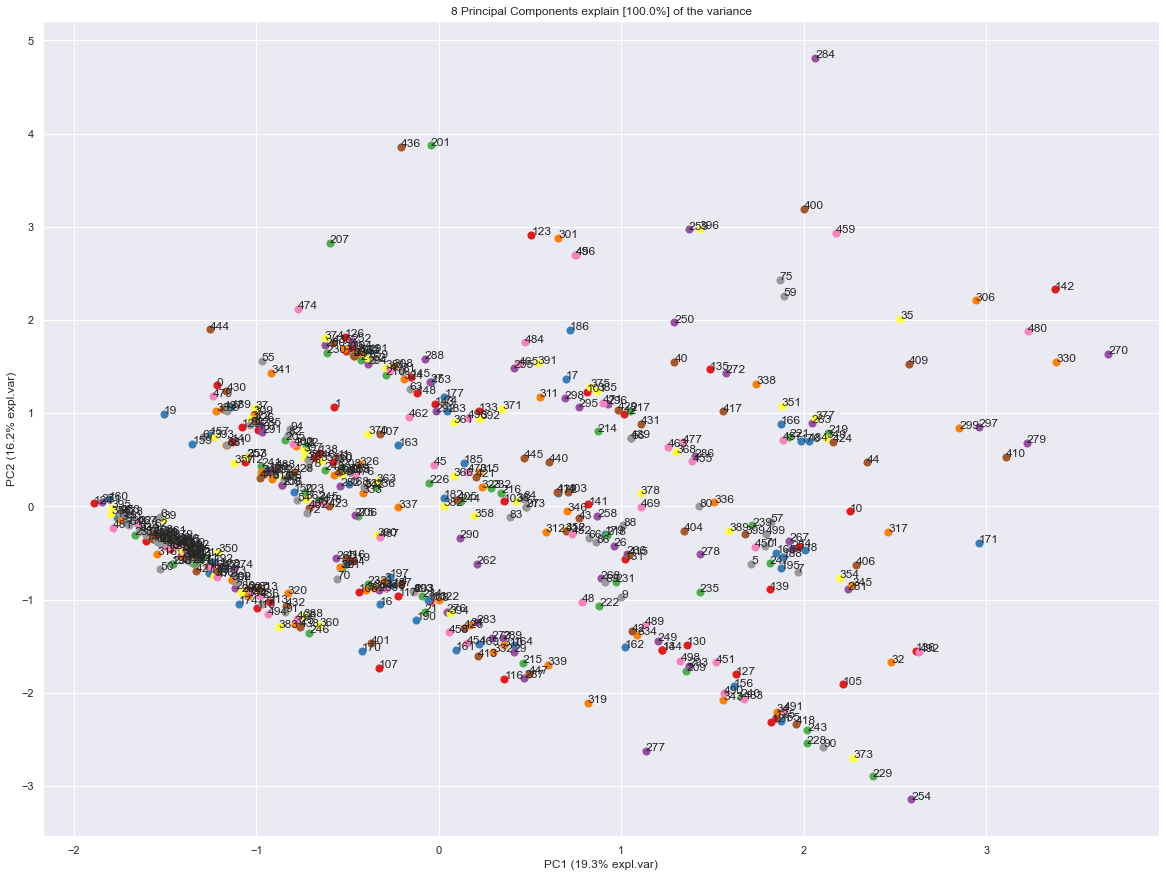

In [15]:
model.scatter(label=True, legend=False)

Eigenvectors

In [16]:
A = out['loadings'].T

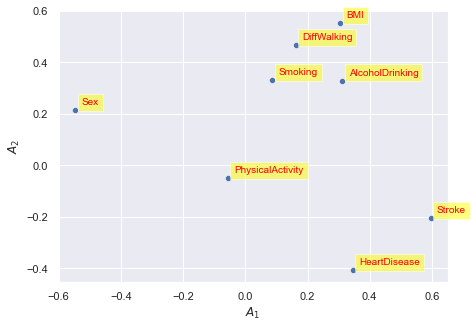

In [17]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

#### Scree Plot

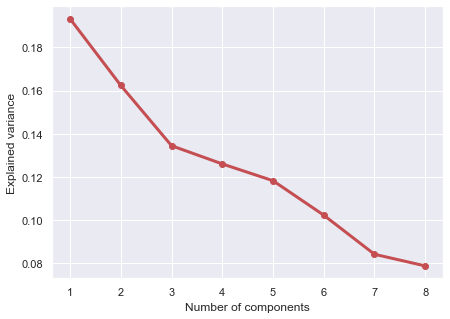

In [18]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

#### Explained Variance

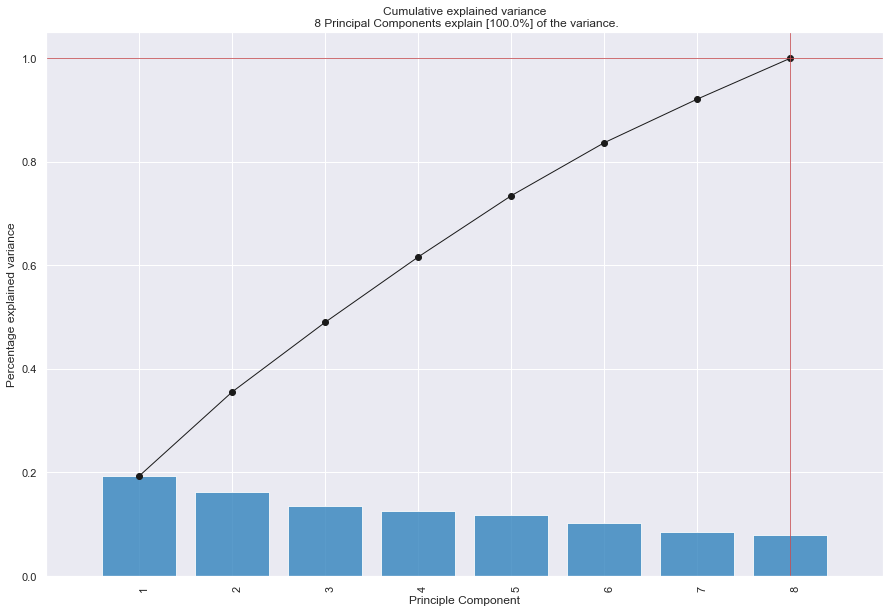

<Figure size 504x360 with 0 Axes>

In [19]:
model.plot();